<a href="https://colab.research.google.com/github/kavyakapoor200/AI-Stock-predictor/blob/main/AI_Stock_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install tensorflow pandas numpy matplotlib yfinance scikit-learn


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


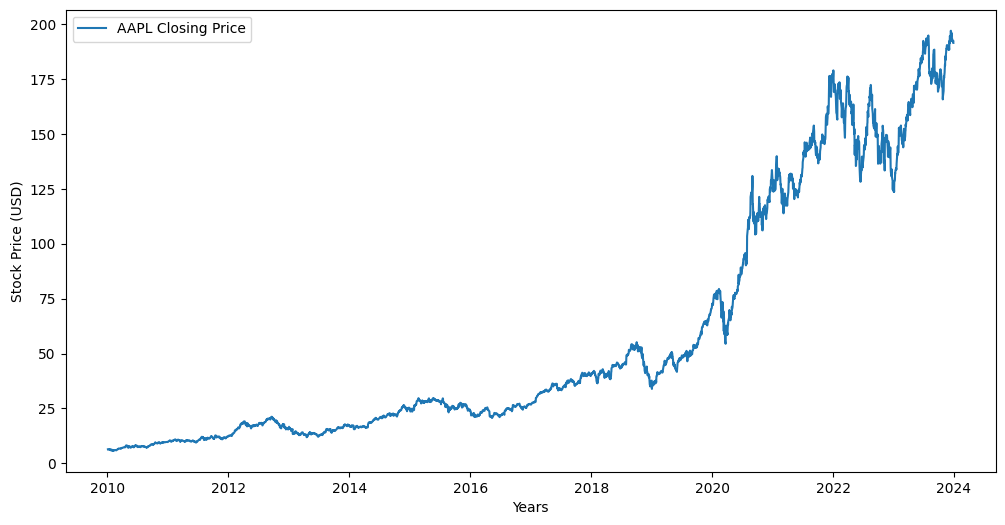

In [3]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Load stock data (Example: Apple 'AAPL')
stock_symbol = "AAPL"
data = yf.download(stock_symbol, start="2010-01-01", end="2024-01-01")

# Visualize stock prices
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label=f'{stock_symbol} Closing Price')
plt.xlabel("Years")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.show()


In [4]:
from sklearn.preprocessing import MinMaxScaler

# Select only the 'Close' price
stock_prices = data['Close'].values.reshape(-1, 1)

# Normalize stock prices (0-1 scale)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_prices = scaler.fit_transform(stock_prices)

# Define function to create time-series dataset
def create_sequences(data, time_step=50):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Create training dataset
time_step = 50  # Use last 50 days to predict the next day
X, y = create_sequences(scaled_prices, time_step)

# Reshape for LSTM input (samples, timesteps, features)
X = X.reshape(X.shape[0], X.shape[1], 1)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (3471, 50, 1)
Shape of y: (3471,)


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Build LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_step, 1)),
    Dropout(0.2),

    LSTM(50, return_sequences=False),
    Dropout(0.2),

    Dense(25),
    Dense(1)  # Output layer (predict next day's stock price)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Display model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Train the model
model.fit(X, y, epochs=50, batch_size=16)  # Increase epochs, reduce batch size



Epoch 1/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - loss: 8.6252e-04
Epoch 2/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - loss: 8.5785e-04
Epoch 3/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 8.8987e-04
Epoch 4/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 7.4293e-04
Epoch 5/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - loss: 7.9645e-04
Epoch 6/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 7.6985e-04
Epoch 7/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 7.1322e-04
Epoch 8/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - loss: 7.2168e-04
Epoch 9/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - loss: 9.4513e-04
Epoch 10/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 8.5472e-04
Epoch 11/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 7.6946e-04
Epoch 12/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - loss: 7.7578e-04
Epoch 13/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 20s 47ms/step - loss: 8.3387e-04
Epoch 14/50
217/217 ━━━━━━━━━━━━━━━━━━━━ 19s 42ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━

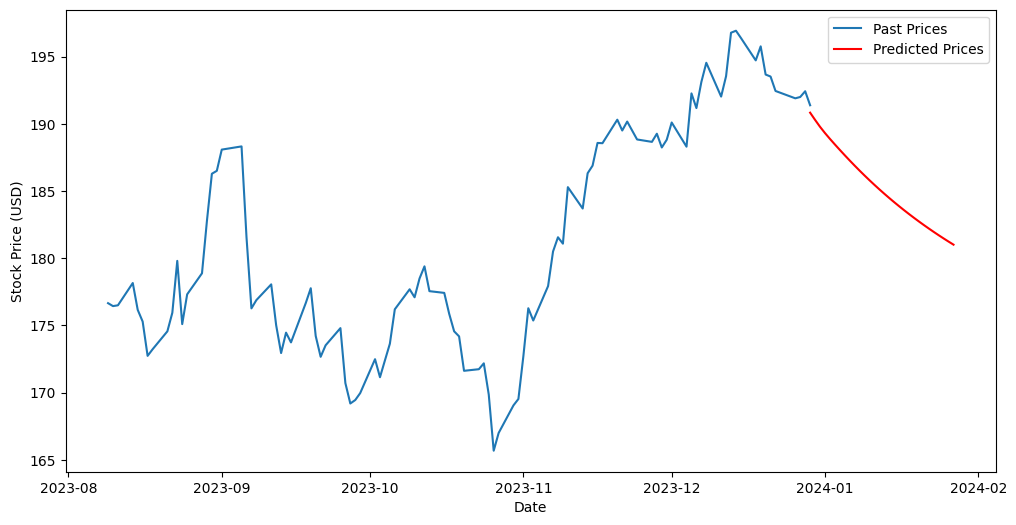

In [8]:
# Predict next 30 days of stock prices
future_predictions = []

# Use last known 50 days for prediction
current_input = scaled_prices[-time_step:].reshape(1, time_step, 1)
for i in range(30):  # Predict next 30 days
    next_pred = model.predict(current_input)  # Predict one day
    future_predictions.append(next_pred[0,0])  # Store prediction

    # Ensure the shape is correctly maintained
    current_input = np.append(current_input[:,1:,:], next_pred.reshape(1,1,1), axis=1)  # FIX SHAPE

# Convert predictions back to original scale
# Convert predictions back to original stock price scale
future_predictions = np.array(future_predictions).reshape(-1, 1)
future_predictions = scaler.inverse_transform(future_predictions)  # FIX SCALING ISSUE


# Plot predictions
plt.figure(figsize=(12, 6))
plt.plot(data.index[-100:], data['Close'].values[-100:], label="Past Prices")
plt.plot(pd.date_range(start=data.index[-1], periods=30), future_predictions, label="Predicted Prices", color="red")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.show()
